<a href="https://colab.research.google.com/github/Ro-netizen004/IntroToPandas/blob/main/linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

#load diabetes dataset
diabetes = load_diabetes()

#convert to pandas dataframe
my_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
my_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
my_df["target"] = diabetes.target
my_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
# Split the data into x and y
X = my_df.drop("target", axis = 1)
Y = my_df["target"]
X.shape, Y.shape

((442, 10), (442,))

In [8]:
from sklearn.model_selection import train_test_split
# split the data into testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
# create a linear regression model
lr = LinearRegression()

# train the model on the training set - this is how the model works
lr.fit(X_train, Y_train)

LinearRegression()

In [11]:
# predict on the testing set
# y_preds are the predicted values based on the features
# compare preds to actual values to determine performance of the model
y_pred = lr.predict(X_test)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the performance of the model
r2 = r2_score(Y_test, y_pred) # variance of the dependent variable explained by the independent variables
                              # how well the model fits the data, higher is better
# average square distance between predicted and actual results, lower is better
mse = mean_squared_error(Y_test, y_pred)
# average absolute distance between predicted and actual results, lower is better
mae = mean_absolute_error(Y_test, y_pred)
#starting point of the regression line on the y-axis
intercept = lr.intercept_

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Intercept:", intercept)

R2 Score: 0.4526027629719195
Mean Squared Error: 2900.193628493482
Mean Absolute Error: 42.79409467959994
Intercept: 151.34560453985995


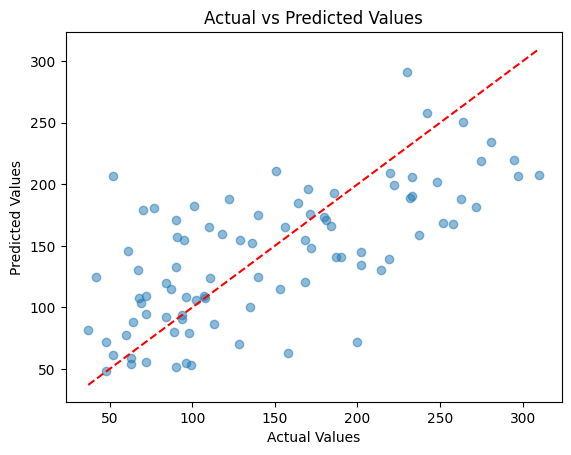

In [20]:
import matplotlib.pyplot as plt
# plot predicted vs actual values

plt.scatter(Y_test, y_pred, alpha = 0.5)
min_val = min(min(Y_test), min(y_pred))
max_val = max(max(Y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


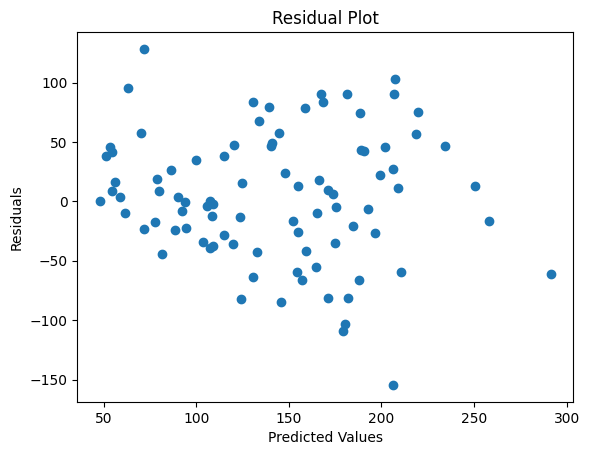

In [17]:
# Plot residuals
# Residuals are plotted against the predicted values of the target variable.
# Residual plot should show a random scatter of points around zero
plt.scatter(y_pred, Y_test - y_pred)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()